In [7]:
pip install  wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [11]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
data = pd.read_csv("/kaggle/input/airline-four-dataset/airline_dataset.csv")

In [13]:
data.drop('negativereason_gold', axis=1, inplace=True)
data.drop('airline_sentiment_gold', axis=1, inplace=True)
data.drop('retweet_count', axis=1, inplace=True)
data.drop('tweet_coord', axis=1, inplace=True)

data.drop('tweet_location', axis=1, inplace=True)
data.drop('tweet_created', axis=1, inplace=True)
data.drop('user_timezone', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
#tweets.drop('',axis=1, inplace=True)

# Check the current list of columns
list(data.columns)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'text']

**Data Preprocessing**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   text                          14640 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 800.8+ KB


In [15]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,@AmericanAir why would I even consider continu...
12059,570305051819941889,neutral,1.0,NaN,NaN,American,@AmericanAir my flight got Cancelled Flightled...
12063,570303383782989824,neutral,1.0,NaN,NaN,American,.@AmericanAir just disappointed with the Fligh...
12066,570301929580048385,neutral,1.0,NaN,NaN,American,@AmericanAir I did
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,@AmericanAir r u serious?? 304min #delay with ...
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,@AmericanAir You are jumping the gun and Cance...
12074,570299252141903873,positive,1.0,NaN,NaN,American,@AmericanAir This is exactly why ill be flying...
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,@AmericanAir This doesn't address my issue. I ...
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,@AmericanAir submitted a case to AA customer r...
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,@AmericanAir if by near the gate you mean sitt...


In [16]:
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = data.isna().sum()
missing_values

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
text                               0
dtype: int64

In [17]:
# removing duplicates

data.drop_duplicates(inplace = True)

# Remove the duplicate rows
data = data.drop_duplicates()

data['text'] = data['text'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
data["text"] = data['text'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
data["text_new"] = data["text"].apply(tokenizer.tokenize)
data["text_new"] = data["text_new"].apply(convert_list_to_str)


data

{"mightn't", 'your', 'how', 'only', 'has', 'himself', 'over', "won't", 'had', 'him', 'were', "it'd", 'after', "they'll", 're', 'again', 'isn', 'other', 'to', 'didn', 'or', 'me', 'wasn', 'be', 'which', "aren't", 'yourself', 'yours', "couldn't", "shouldn't", 'if', "weren't", 'here', 'an', 'have', 'doing', 'them', "i'm", 'once', 'at', 'myself', 'then', 'through', 'those', 'all', 'its', 'so', 'nor', 'haven', 's', 'theirs', 'who', "you'll", "hasn't", 'can', 'wouldn', "i'd", 'down', 'he', 'these', "needn't", "it'll", 'too', 'd', 'as', 'did', 'why', 'in', 'with', "she'll", "we've", 'on', "it's", 'the', "isn't", "should've", 'won', 'ain', 'while', "shan't", 'more', 'few', 'both', "i'll", 'it', 'll', 've', 'and', 'doesn', 'herself', 'above', 'not', 'under', 'ma', 'before', 'weren', "hadn't", 'needn', "she's", 'now', "they're", 'between', 'just', 'into', 'whom', 'where', "didn't", 'against', 'don', 'having', "mustn't", 'of', "you've", 'by', 'for', 'but', "doesn't", 'will', 'mightn', 'are', "he's

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,text_new
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,@virginamerica @dhepburn said.,virginamerica dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,@virginamerica plus added commercials experien...,virginamerica plus added commercials experienc...
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,@virginamerica today... must mean need take an...,virginamerica today must mean need take anothe...
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,@virginamerica really aggressive blast obnoxio...,virginamerica really aggressive blast obnoxiou...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,@virginamerica really big bad thing,virginamerica really big bad thing
...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,@americanair thank got different flight chicago.,americanair thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,@americanair leaving 20 minutes late flight. w...,americanair leaving 20 minutes late flight war...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,@americanair please bring american airlines #b...,americanair please bring american airlines bla...
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,"@americanair money, change flight, answer phon...",americanair money change flight answer phones ...


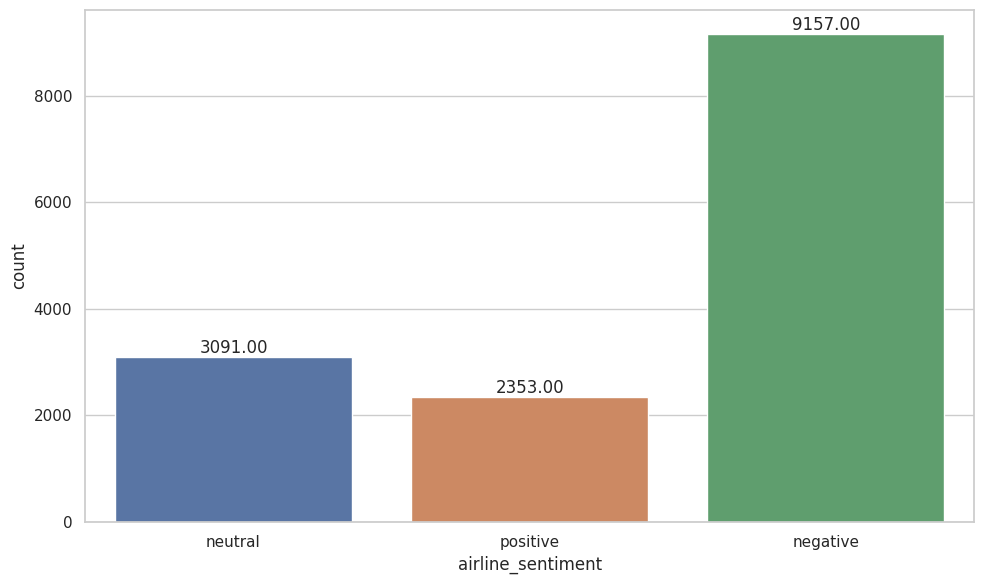

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=data)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer



# Select relevant columns
data = data[['airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'text']]

# Handle missing values (fill NaN with "Unknown" for categorical columns)
data['negativereason'] = data['negativereason'].fillna("Unknown")
data['negativereason_confidence'] = data['negativereason_confidence'].fillna(0)

# Convert sentiment to categorical
data['airline_sentiment'] = data['airline_sentiment'].astype('category')

# Display dataset info
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
Index: 14601 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   airline_sentiment             14601 non-null  category
 1   airline_sentiment_confidence  14601 non-null  float64 
 2   negativereason                14601 non-null  object  
 3   negativereason_confidence     14601 non-null  float64 
 4   airline                       14601 non-null  object  
 5   text                          14601 non-null  object  
dtypes: category(1), float64(2), object(3)
memory usage: 698.8+ KB
None
  airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000        Unknown   
1          positive                        0.3486        Unknown   
2           neutral                        0.6837        Unknown   
3          negative                        1.0000     Bad Flight   
4    

**Overall Sentiment Distribution**

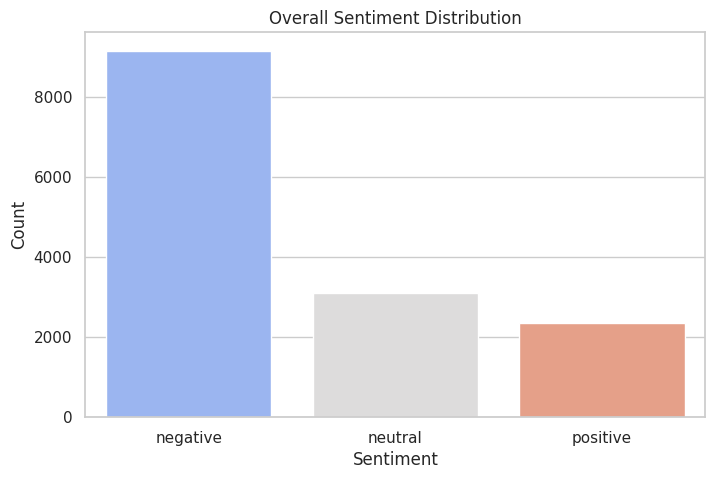

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=data['airline_sentiment'].value_counts().index, 
            y=data['airline_sentiment'].value_counts().values, 
            palette='coolwarm')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Overall Sentiment Distribution")
plt.show()


**Sentiment Distribution by Airline**

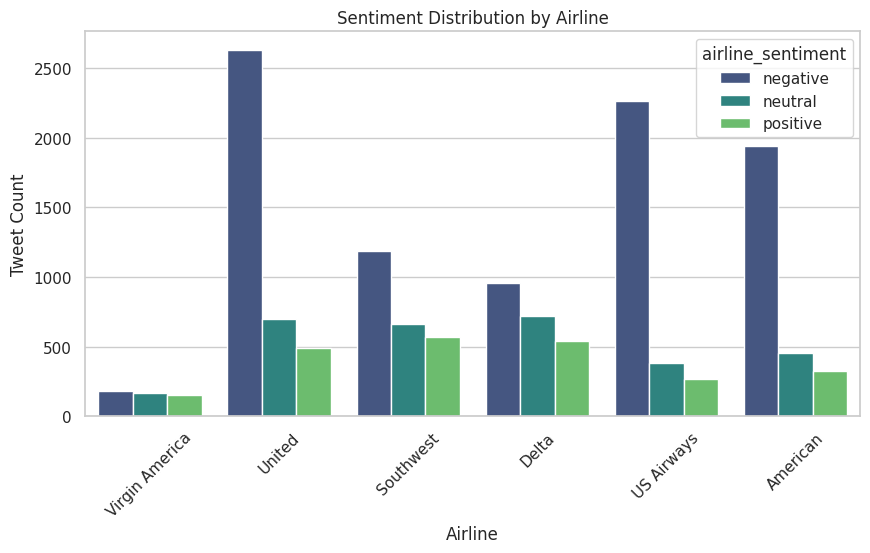

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='airline', hue='airline_sentiment', palette='viridis')
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.title("Sentiment Distribution by Airline")
plt.xticks(rotation=45)
plt.show()


**Percentage of Positive Tweets**

In [23]:
pos_tweets = len(data[data['airline_sentiment'] == 'positive'])
total_tweets = len(data)
print(f"Percentage of Positive Tweets: {round((pos_tweets / total_tweets) * 100, 2)}%")


Percentage of Positive Tweets: 16.12%


**Most Common Words in Negative Tweets**

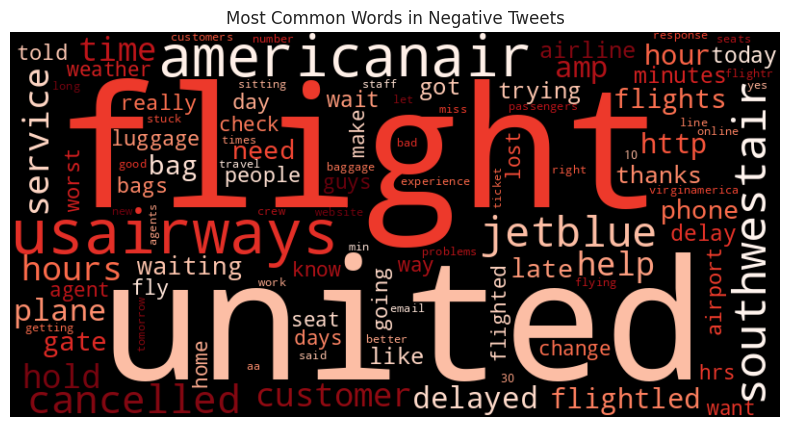

In [25]:
negative_tweets = data[data['airline_sentiment'] == 'negative']['text']
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(negative_tweets)
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Negative Tweets")
plt.show()


**Most Common Words in Positive Tweets**

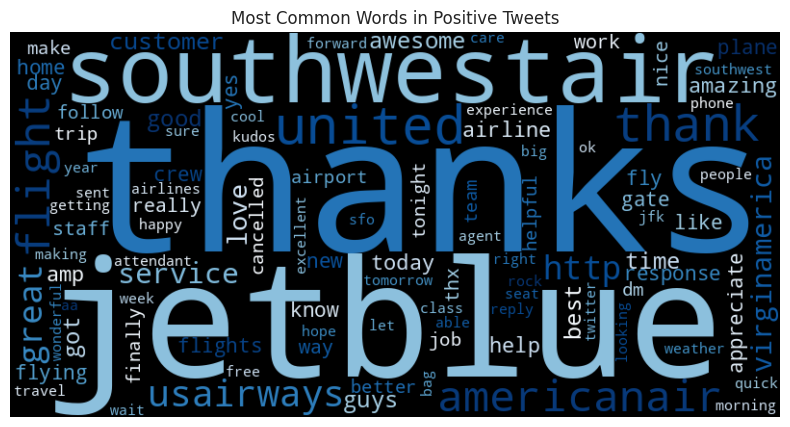

In [26]:
positive_tweets = data[data['airline_sentiment'] == 'positive']['text']
X_pos = vectorizer.fit_transform(positive_tweets)
word_freq_pos = dict(zip(vectorizer.get_feature_names_out(), X_pos.toarray().sum(axis=0)))

wordcloud_pos = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate_from_frequencies(word_freq_pos)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Positive Tweets")
plt.show()


**Sentiment Comparison Across Airlines**

<Figure size 1000x600 with 0 Axes>

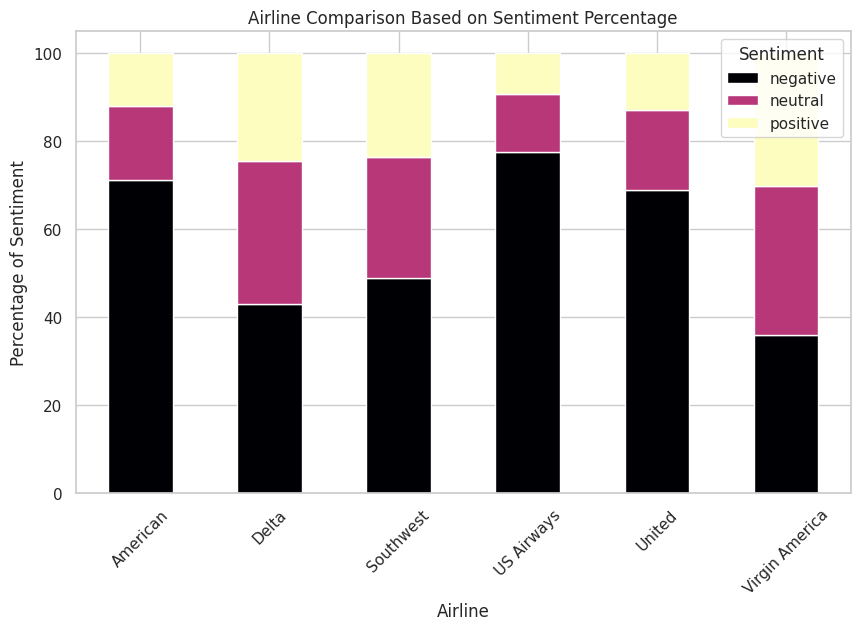

In [27]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).size().unstack()
percentage_sentiment = airline_sentiment.div(airline_sentiment.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
percentage_sentiment.plot(kind='bar', stacked=True, colormap='magma', figsize=(10,6))
plt.xlabel("Airline")
plt.ylabel("Percentage of Sentiment")
plt.title("Airline Comparison Based on Sentiment Percentage")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()


**Most Common Negative Reasons**

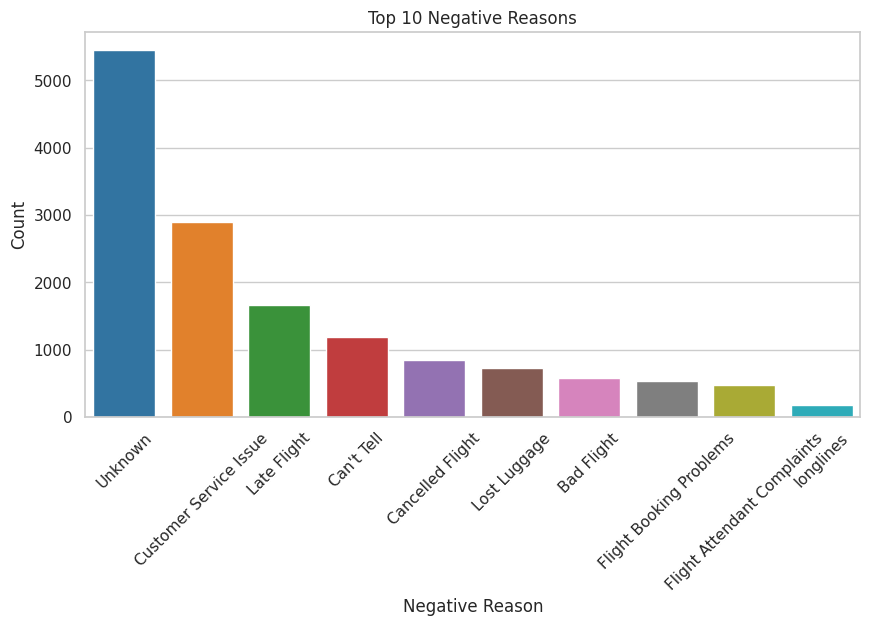

In [28]:
neg_reason_counts = data['negativereason'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=neg_reason_counts.index, y=neg_reason_counts.values, palette='tab10')
plt.xlabel("Negative Reason")
plt.ylabel("Count")
plt.title("Top 10 Negative Reasons")
plt.xticks(rotation=45)
plt.show()


**Airlines with Most Negative Tweets**

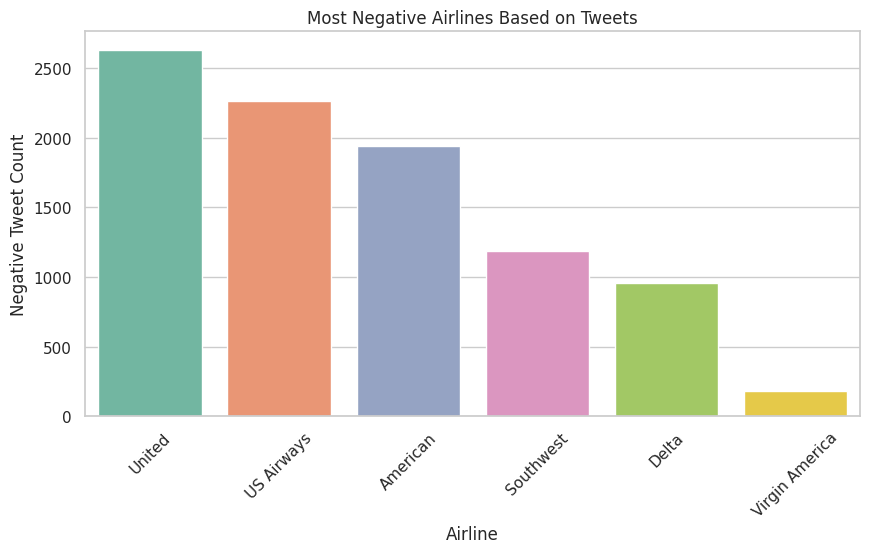

In [29]:
neg_tweets_per_airline = data[data['airline_sentiment'] == 'negative']['airline'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=neg_tweets_per_airline.index, y=neg_tweets_per_airline.values, palette='Set2')
plt.xlabel("Airline")
plt.ylabel("Negative Tweet Count")
plt.title("Most Negative Airlines Based on Tweets")
plt.xticks(rotation=45)
plt.show()


**Negative Sentiment Percentage for Each Airline**

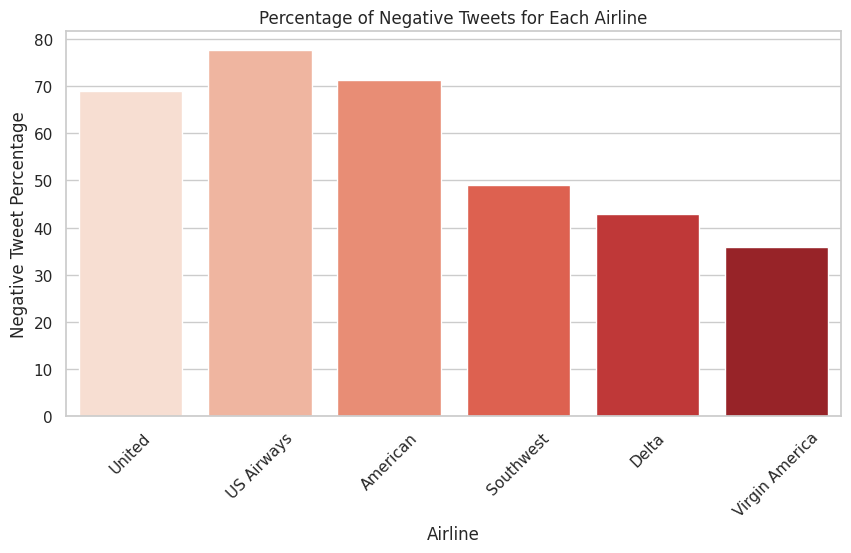

In [31]:
# Count total tweets per airline
total_tweets_per_airline = data['airline'].value_counts()

# Count negative tweets per airline
negative_tweets_per_airline = data[data['airline_sentiment'] == 'negative']['airline'].value_counts()

# Calculate percentage of negative tweets
negative_percentage = (negative_tweets_per_airline / total_tweets_per_airline) * 100

# Plot negative sentiment percentage
plt.figure(figsize=(10,5))
sns.barplot(x=negative_percentage.index, y=negative_percentage.values, palette='Reds')
plt.xlabel("Airline")
plt.ylabel("Negative Tweet Percentage")
plt.title("Percentage of Negative Tweets for Each Airline")
plt.xticks(rotation=45)
plt.show()


**Positive Sentiment Percentage for Each Airline**

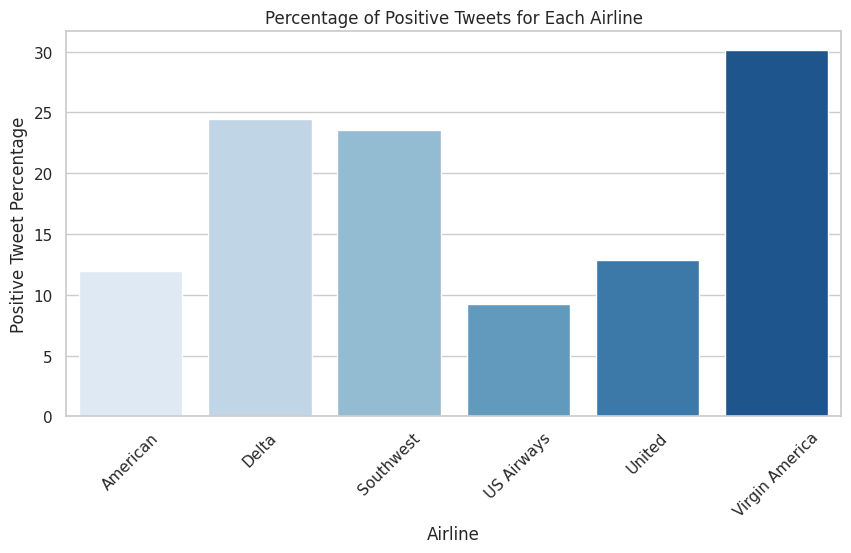

In [32]:
# Count positive tweets per airline
positive_tweets_per_airline = data[data['airline_sentiment'] == 'positive']['airline'].value_counts()

# Calculate percentage of positive tweets
positive_percentage = (positive_tweets_per_airline / total_tweets_per_airline) * 100

# Plot positive sentiment percentage
plt.figure(figsize=(10,5))
sns.barplot(x=positive_percentage.index, y=positive_percentage.values, palette='Blues')
plt.xlabel("Airline")
plt.ylabel("Positive Tweet Percentage")
plt.title("Percentage of Positive Tweets for Each Airline")
plt.xticks(rotation=45)
plt.show()


**Neutral Sentiment Percentage for Each Airline**

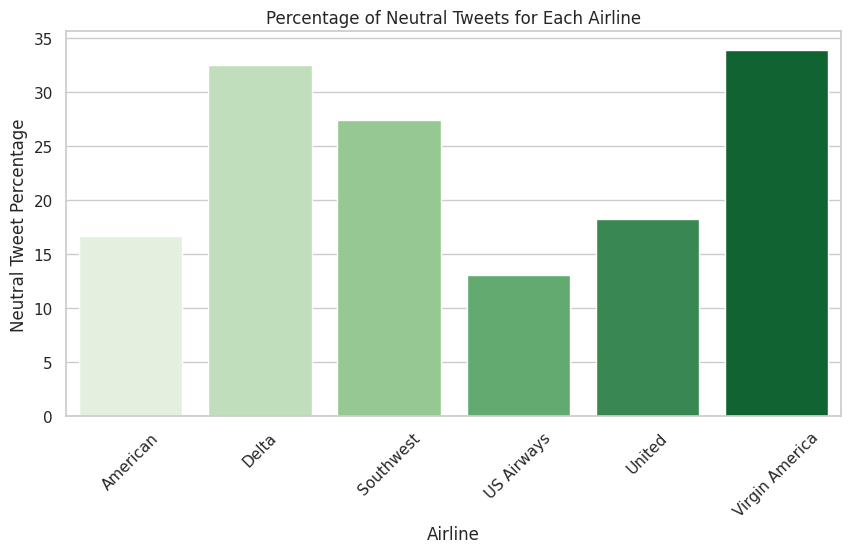

In [33]:
# Count neutral tweets per airline
neutral_tweets_per_airline = data[data['airline_sentiment'] == 'neutral']['airline'].value_counts()

# Calculate percentage of neutral tweets
neutral_percentage = (neutral_tweets_per_airline / total_tweets_per_airline) * 100

# Plot neutral sentiment percentage
plt.figure(figsize=(10,5))
sns.barplot(x=neutral_percentage.index, y=neutral_percentage.values, palette='Greens')
plt.xlabel("Airline")
plt.ylabel("Neutral Tweet Percentage")
plt.title("Percentage of Neutral Tweets for Each Airline")
plt.xticks(rotation=45)
plt.show()
